In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import geopandas as gpd


In [2]:
data = pd.read_csv('/home/slindhult/assignments/Capstone-1/Data/pollution_us_2000_2016.csv')

In [3]:
#Identifying null values
lst=[]

for col in data.columns:
    lst.append((col, data[col].isnull().sum()))
lst

[('Unnamed: 0', 0),
 ('State Code', 0),
 ('County Code', 0),
 ('Site Num', 0),
 ('Address', 0),
 ('State', 0),
 ('County', 0),
 ('City', 0),
 ('Date Local', 0),
 ('NO2 Units', 0),
 ('NO2 Mean', 0),
 ('NO2 1st Max Value', 0),
 ('NO2 1st Max Hour', 0),
 ('NO2 AQI', 0),
 ('O3 Units', 0),
 ('O3 Mean', 0),
 ('O3 1st Max Value', 0),
 ('O3 1st Max Hour', 0),
 ('O3 AQI', 0),
 ('SO2 Units', 0),
 ('SO2 Mean', 0),
 ('SO2 1st Max Value', 0),
 ('SO2 1st Max Hour', 0),
 ('SO2 AQI', 872907),
 ('CO Units', 0),
 ('CO Mean', 0),
 ('CO 1st Max Value', 0),
 ('CO 1st Max Hour', 0),
 ('CO AQI', 873323)]

In [4]:
cols_list = ['NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI']
a = data.copy()
purged = a[(a[['NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour',
       'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour']] >=0).all(1)]

In [5]:
purged.shape

(1722197, 29)

In [6]:
state = purged[[
       'State', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
        'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI']].copy()

In [7]:
s = state.groupby('State').agg({'NO2 Mean':'mean',
       'NO2 1st Max Value':'mean', 'NO2 1st Max Hour':'mean', 'NO2 AQI':'mean',
       'O3 Mean':'mean', 'O3 1st Max Value':'mean', 'O3 1st Max Hour':'mean', 'O3 AQI':'mean',
       'SO2 Mean':'mean', 'SO2 1st Max Value':'mean', 'SO2 1st Max Hour':'mean', 'SO2 AQI':'mean',
        'CO Mean':'mean', 'CO 1st Max Value':'mean', 'CO 1st Max Hour':'mean', 'CO AQI':'mean'})

In [8]:
total = s[['NO2 AQI',
       'O3 AQI', 'SO2 AQI', 'CO AQI']].copy()

In [9]:
total.head()
total.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')

,State,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
0,Alabama,21.329450,37.029773,7.095855,3.856311
1,Alaska,19.553191,17.725431,14.487335,6.528340
2,Arizona,36.110879,39.004382,4.214693,9.192756
3,Arkansas,21.486471,35.035662,2.975773,5.929914
4,California,24.339912,35.773237,3.658163,7.464027
5,Colorado,35.972034,34.675010,10.634384,7.736236
6,Connecticut,18.620579,37.169378,3.258446,3.604698
7,Country Of Mexico,37.989060,31.957711,6.565839,17.700525
8,Delaware,21.541047,35.400000,2.819835,3.839384
9,District Of Columbia,30.670972,33.804525,12.958151,11.648325


In [10]:
contiguous_usa = gpd.read_file('data/cb_2018_us_state_20m/cb_2018_us_state_20m.shp')
contiguous_usa.head()

DriverError: data/cb_2018_us_state_20m/cb_2018_us_state_20m.shp: No such file or directory

In [11]:
contiguous_usa=contiguous_usa.rename(columns={'NAME': 'State'})


NameError: name 'contiguous_usa' is not defined

In [12]:
contiguous_usa.head()

NameError: name 'contiguous_usa' is not defined

In [13]:
merged = pd.merge(contiguous_usa, total, left_on='State', right_on='State')

NameError: name 'contiguous_usa' is not defined

In [14]:
merged = merged[['NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI', 'State','geometry']]
merged = merged.loc[~merged['State'].isin(['Alaska', 'Hawaii'])]
merged.rename(columns = {'NO2 AQI':'NO2_AQI'})

NameError: name 'merged' is not defined

In [15]:
import json
from bokeh.io import show
from bokeh.models import (CDSView, ColorBar, ColumnDataSource,
                          CustomJS, CustomJSFilter, 
                          GeoJSONDataSource, HoverTool,
                          LinearColorMapper, Slider)
from bokeh.layouts import column, row, widgetbox
from bokeh.palettes import brewer
from bokeh.plotting import figure
# Input GeoJSON source that contains features for plotting
geosource = GeoJSONDataSource(geojson = merged.to_json())

NameError: name 'merged' is not defined

In [16]:
# Define color palettes
palette = brewer['BuGn'][8]
palette = palette[::-1] # reverse order of colors so higher values have darker colors
# Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 40)
# Define custom tick labels for color bar.
tick_labels = {'0':'0','3': '3', '5': '5',
 '10':'10', '15':'15',
 '20':'20', '25':'25',
 '30':'30', '35':'35+'}
# Create color bar.
color_bar = ColorBar(color_mapper = color_mapper, 
                     label_standoff = 8,
                     width = 500, height = 20,
                     border_line_color = None,
                     location = (0,0), 
                     orientation = 'horizontal',
                     major_label_overrides = tick_labels)

# Create figure object.
p = figure(title = 'Average Air Pollution Levels, 2000-2016', 
           plot_height = 600 ,
           plot_width = 950, 
           toolbar_location = 'below',
           tools = 'pan,wheel_zoom, box_zoom, reset')
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
# Add patch renderer to figure.
states = p.patches('xs','ys', source = geosource,
                   fill_color = {'field':'NO2_AQI', 'transform': color_mapper},
                   line_color = 'black', 
                   line_width = 0.25, 
                   fill_alpha = 1)
# Create hover tool
p.add_tools(HoverTool(renderers = [states],
                      tooltips = [('State','@State'),
                                ('NO2_AQI','@NO2_AQI')]))
p.add_layout(color_bar, 'below')
show(p)

NameError: name 'geosource' is not defined

In [17]:
# Added bins for AQI rating scale
purged['SO2 AQI Level'] = pd.cut(purged['SO2 AQI'], bins=[0,50,100,150,200,300,500], labels = ['Good','Moderate','Unhealthy for Sensitive Groups','Unhealthy','Very Unhealthy','Hazardous'])
purged['NO2 AQI Level'] = pd.cut(purged['NO2 AQI'], bins=[0,50,100,150,200,300,500], labels = ['Good','Moderate','Unhealthy for Sensitive Groups','Unhealthy','Very Unhealthy','Hazardous'])
purged['O3 AQI Level'] = pd.cut(purged['O3 AQI'], bins=[0,50,100,150,200,300,500], labels = ['Good','Moderate','Unhealthy for Sensitive Groups','Unhealthy','Very Unhealthy','Hazardous'])
purged['CO AQI Level'] = pd.cut(purged['CO AQI'], bins=[0,50,100,150,200,300,500], labels = ['Good','Moderate','Unhealthy for Sensitive Groups','Unhealthy','Very Unhealthy','Hazardous'])

In [18]:
#purged['Date Local']=pd.to_datetime(purged['Date Local'])

In [ ]:
purged.head()

In [20]:
aqi = purged[['Date Local','SO2 AQI Level','NO2 AQI Level','O3 AQI Level','CO AQI Level']]

In [21]:
aqi['year'] = aqi['Date Local'].apply(lambda x: x[:4])

In [22]:
aqi.drop(['Date Local'],axis=1)

,SO2 AQI Level,NO2 AQI Level,O3 AQI Level,CO AQI Level,year
0,Good,Good,Good,NaN,2000
1,Good,Good,Good,Good,2000
2,NaN,Good,Good,NaN,2000
3,NaN,Good,Good,Good,2000
4,Good,Good,Good,NaN,2000
...,...,...,...,...,...
1746654,NaN,Good,Good,Good,2016
1746655,NaN,Good,Good,NaN,2016
1746656,NaN,Good,Good,Good,2016
1746659,NaN,Good,Good,NaN,2016


In [23]:
test = aqi.agg({'SO2 AQI Level':'value_counts','NO2 AQI Level':'value_counts','O3 AQI Level':'value_counts','CO AQI Level':'value_counts'})

In [24]:
groups = ['Good','Moderate','Unhealthy for Sensitive Groups','Unhealthy','Very Unhealthy','Hazardous']
cols = [O2 AQI Leve]
test_list = []
for col in cols:
    for i in groups:
        test_list.append((col, aqi[col].value_counts()))

SyntaxError: invalid syntax (<ipython-input-24-6b6902e06413>, line 2)

In [25]:
test.head()

,SO2 AQI Level,NO2 AQI Level,O3 AQI Level,CO AQI Level
Good,667047,1628013,1536513,826299
Moderate,12278,80432,150266,1082
Unhealthy for Sensitive Groups,1421,2340,30920,38
Unhealthy,58,0,3626,6
Very Unhealthy,0,0,272,2


In [26]:
test.index

CategoricalIndex(['Good', 'Moderate', 'Unhealthy for Sensitive Groups',
                  'Unhealthy', 'Very Unhealthy', 'Hazardous'],
                 categories=['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous'], ordered=True, dtype='category')

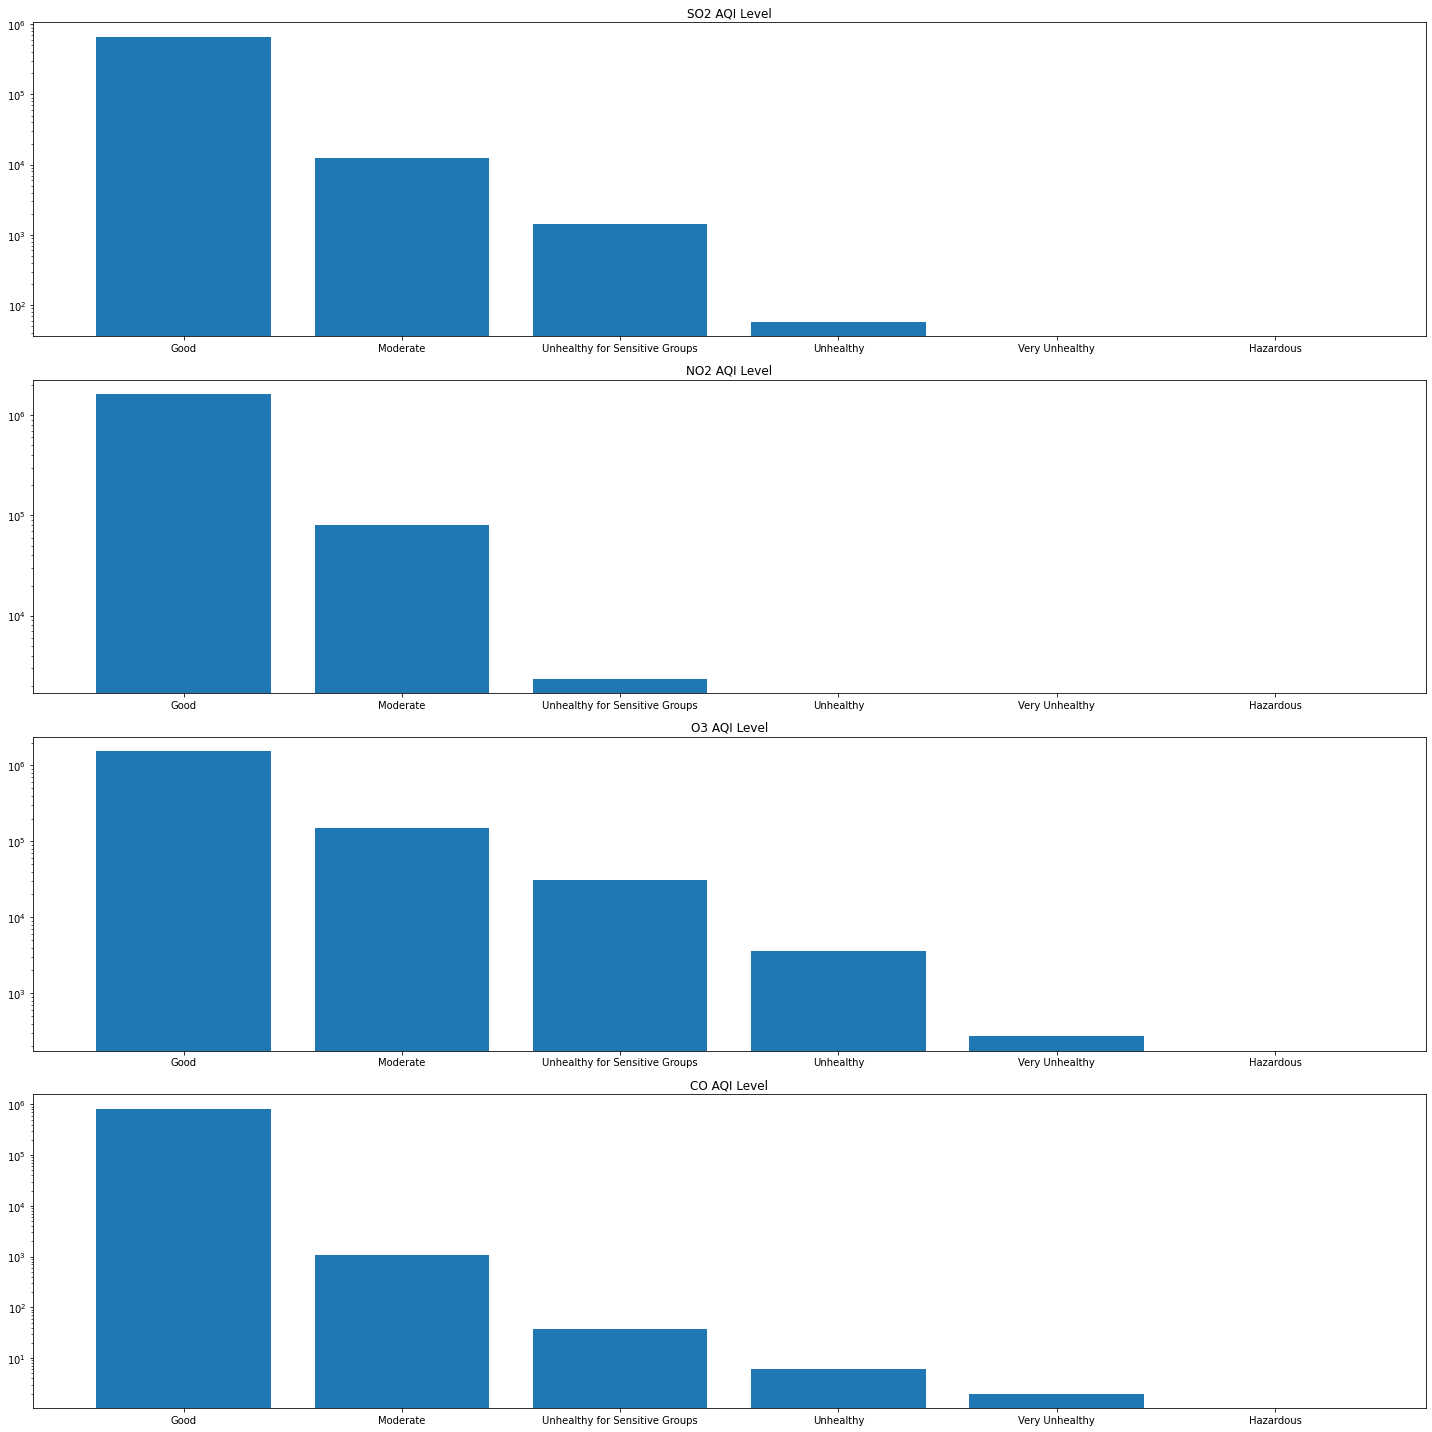

In [27]:
#year by year number of grouped days
fig, axs = plt.subplots(4,1,figsize=(20,20))

cols = ['SO2 AQI Level','NO2 AQI Level','O3 AQI Level','CO AQI Level']
axs=axs.flatten()
for i, col in enumerate(cols):   
    axs[i].bar(test.index,test[col], width=.8,)
    axs[i].set_title(col)
    axs[i].set_yscale('log')
fig.tight_layout() 

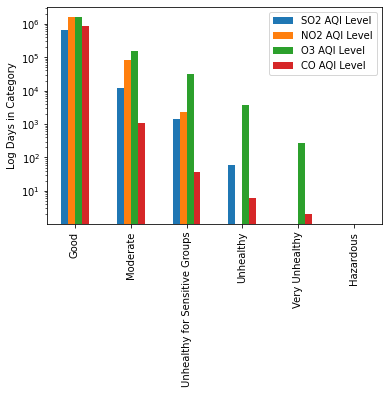

In [28]:
test.plot.bar();
plt.ylabel('Log Days in Category')
plt.yscale('log')

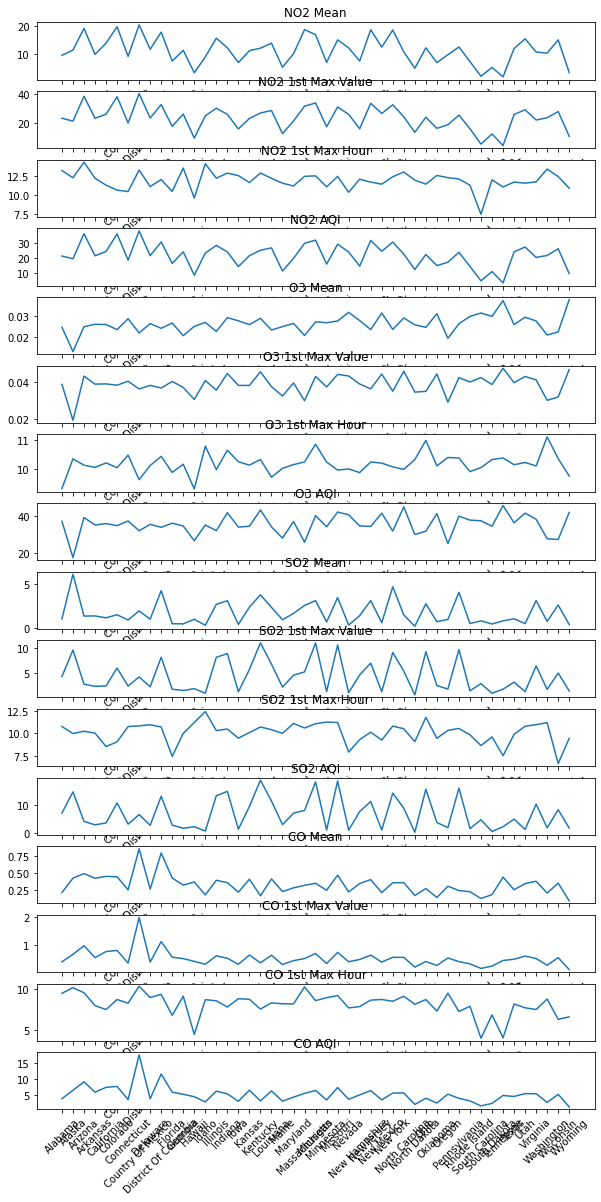

In [195]:
cols = ['NO2 Mean', 'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Mean',
       'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI', 'CO Mean',
       'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI']
fig, axs = plt.subplots(16,1,figsize=(10,20))

axs=axs.flatten()
for i, col in enumerate(cols):   
    axs[i].plot(s.index,s[col])
    axs[i].set_title(col)
    axs[i].set_xticklabels(labels=s.index,rotation=45)


In [30]:
purged['year'] = purged['Date Local'].apply(lambda x: x[:4])

In [139]:
year = purged[['State',
         'NO2 Mean', 'NO2 AQI',
       'O3 Mean','O3 AQI',
       'SO2 Mean','SO2 AQI',
        'CO Mean','CO AQI', 'year']].copy()

In [140]:
# Mean pollutants
y = year.groupby(['year','State']).agg({'NO2 Mean':'mean',
       'NO2 AQI':'mean',
       'O3 Mean':'mean', 'O3 AQI':'mean',
       'SO2 Mean':'mean', 'SO2 AQI':'mean',
        'CO Mean':'mean', 'CO AQI':'mean'})

In [141]:
year

,State,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI,year
0,Arizona,19.041667,46,0.022500,34,3.000000,13.0,1.145833,NaN,2000
1,Arizona,19.041667,46,0.022500,34,3.000000,13.0,0.878947,25.0,2000
2,Arizona,19.041667,46,0.022500,34,2.975000,NaN,1.145833,NaN,2000
3,Arizona,19.041667,46,0.022500,34,2.975000,NaN,0.878947,25.0,2000
4,Arizona,22.958333,34,0.013375,27,1.958333,4.0,0.850000,NaN,2000
...,...,...,...,...,...,...,...,...,...,...
1746654,Wyoming,1.083333,1,0.043917,44,0.016667,0.0,0.091667,1.0,2016
1746655,Wyoming,1.083333,1,0.043917,44,0.000000,NaN,0.101042,NaN,2016
1746656,Wyoming,1.083333,1,0.043917,44,0.000000,NaN,0.091667,1.0,2016
1746659,Wyoming,0.939130,1,0.045263,44,0.000000,NaN,0.067714,NaN,2016


In [142]:
y

NO2 Mean    NO2 AQI   O3 Mean     O3 AQI  \
year State                                                             
2000 Arizona               26.487502  47.117747  0.023655  39.026735   
     California            17.580989  29.993446  0.023675  32.715206   
     Colorado              14.902469  32.753425  0.017066  27.553425   
     District Of Columbia  22.725717  37.296703  0.017567  27.956044   
     Florida               12.453038  25.573034  0.026261  39.219101   
...                              ...        ...       ...        ...   
2016 Texas                 10.444856  21.486456  0.026716  36.383747   
     Utah                  31.515873  43.142857  0.013308  21.952381   
     Virginia              10.320663  20.550000  0.022908  29.350000   
     Washington            14.730538  26.586207  0.015901  23.689655   
     Wyoming                5.744883  15.229508  0.035534  39.950820   

                           SO2 Mean    SO2 AQI   CO Mean     CO AQI  
year State                                                           
2000 Arizona               2.303226   7.501421  0.745756  15.164866  
     California            1.721004   6.045410  0.644488  11.269346  
     Colorado              2.138058  21.509589  0.611388  11.558904  
     District Of Columbia  8.137540  24.774725  1.175696  18.563187  
     Florida               1.973912   7.556180  0.725072  10.342697  
...                             ...        ...       ...        ...  
2016 Texas                 0.401371   1.643836  0.236289   4.283296  
     Utah                  0.661726   1.000000  0.515134   8.333333  
     Virginia              0.550617   1.166667  0.291826   4.450000  
     Washington            0.202716   0.733333  0.274327   4.206897  
     Wyoming               0.090247   0.620690  0.094174   1.295082  

[496 rows x 8 columns]

In [ ]:
states=year['State'].unique()

In [ ]:
for state in states:
    state = year[(year[['State']]==state).any(1)]

In [31]:
state = purged[[
       'State', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
        'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI']].copy()

In [122]:
# Mean pollutants
s = state.groupby('State').agg({'NO2 Mean':'mean',
       'NO2 1st Max Value':'mean', 'NO2 1st Max Hour':'mean', 'NO2 AQI':'mean',
       'O3 Mean':'mean', 'O3 1st Max Value':'mean', 'O3 1st Max Hour':'mean', 'O3 AQI':'mean',
       'SO2 Mean':'mean', 'SO2 1st Max Value':'mean', 'SO2 1st Max Hour':'mean', 'SO2 AQI':'mean',
        'CO Mean':'mean', 'CO 1st Max Value':'mean', 'CO 1st Max Hour':'mean', 'CO AQI':'mean'})

In [132]:
montana = pd.Series([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
vermont = pd.Series([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
mississippi = pd.Series([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
add_states = pd.DataFrame([montana, vermont, mississippi],index = ['Montana', 'Vermont', 'Mississippi'])
add_states

add_states = add_states.rename(columns={0:'NO2 Mean', 1:'NO2 1st Max Value', 2:'NO2 1st Max Hour', 3:'NO2 AQI',
       4:'O3 Mean', 5:'O3 1st Max Value', 6:'O3 1st Max Hour', 7:'O3 AQI', 8:'SO2 Mean',
       9:'SO2 1st Max Value', 10:'SO2 1st Max Hour', 11:'SO2 AQI', 12:'CO Mean',
       13:'CO 1st Max Value', 14:'CO 1st Max Hour', 15:'CO AQI'})

In [135]:
s2 = s.append(add_states)
s2

,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
Alabama,9.444689,23.073592,13.154693,21.329450,0.024721,0.038617,9.314563,37.029773,1.047012,4.278252,10.780583,7.095855,0.213130,0.408748,9.442071,3.856311
Alaska,11.313152,21.046910,12.218845,19.553191,0.012799,0.019116,10.341439,17.725431,6.083755,9.659372,9.983789,14.487335,0.423438,0.677599,10.138804,6.528340
Arizona,19.070777,38.402661,14.231210,36.110879,0.024988,0.043124,10.121992,39.004382,1.364530,2.729275,10.249169,4.214693,0.490703,0.982655,9.511758,9.192756
Arkansas,9.753701,23.094102,12.160195,21.486471,0.026169,0.038766,10.046983,35.035662,1.383302,2.272116,10.036115,2.975773,0.422393,0.558514,7.939375,5.929914
California,13.787563,25.830238,11.262146,24.339912,0.026051,0.038886,10.201726,35.773237,1.167357,2.368681,8.522095,3.658163,0.450185,0.775835,7.462303,7.464027
Colorado,19.658529,38.093663,10.616455,35.972034,0.023543,0.038188,10.035549,34.675010,1.512977,5.994310,9.049946,10.634384,0.443967,0.815528,8.689064,7.736236
Connecticut,9.072919,19.752322,10.436791,18.620579,0.028878,0.040343,10.472226,37.169378,0.921591,2.350378,10.775580,3.258446,0.251949,0.368248,8.243757,3.604698
Country Of Mexico,20.331830,40.299600,13.217968,37.989060,0.021917,0.036104,9.617505,31.957711,1.945775,4.197170,10.853461,6.565839,0.853503,1.985410,10.312329,17.700525
Delaware,11.584773,23.194050,11.089256,21.541047,0.026494,0.038084,10.110193,35.400000,1.014242,2.189091,10.987052,2.819835,0.261600,0.401025,8.929477,3.839384
District Of Columbia,17.728988,32.550650,11.979255,30.670972,0.024181,0.036654,10.428918,33.804525,4.232242,8.199217,10.724597,12.958151,0.793241,1.129630,9.322100,11.648325


In [33]:
# set the filepath and load in a shapefile
fp = '/home/slindhult/assignments/Capstone-1/data/cb_2018_us_state_20m/cb_2018_us_state_20m.shp'
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987..."


In [107]:
map_df.iloc[27]

STATEFP                                                    30
STATENS                                              00767982
AFFGEOID                                          0400000US30
GEOID                                                      30
STUSPS                                                     MT
NAME                                                  Montana
LSAD                                                       00
ALAND                                            376962738765
AWATER                                             3869208832
geometry    POLYGON ((-116.049193 49.000912, -115.501016 4...
Name: 27, dtype: object

In [35]:
merged = pd.merge(s, map_df, left_on='State', right_on='NAME')

In [50]:
merged = merged.loc[~merged['NAME'].isin(['Alaska', 'Hawaii'])]

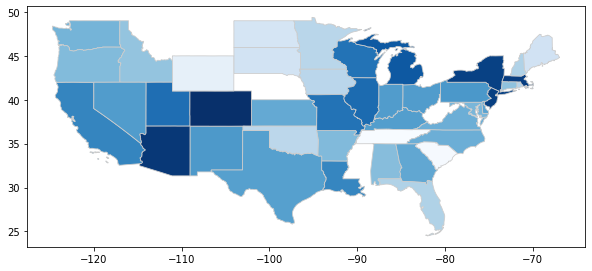

In [100]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'NO2 Mean'
# set the range for the choropleth
vmin, vmax = 0, 140
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

joined.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

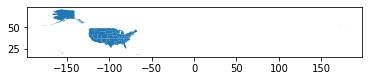

In [52]:
map_df.plot()

In [136]:

joined = map_df.set_index('NAME').join(s2)
joined.shape


(52, 25)

In [137]:
joined = joined.loc[~joined.index.isin(['Alaska', 'Hawaii'])]

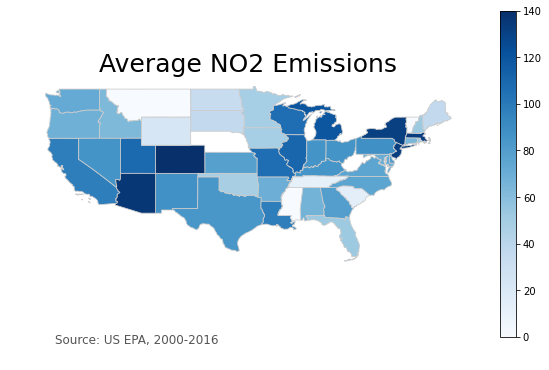

In [138]:
# select a variable to map
variable = 'NO2 Mean'
# set the range for the choropleth
vmin, vmax = 0, 140
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
joined.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8');
ax.axis('off')


# add a title
ax.set_title('Average NO2 Emissions', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Source: US EPA, 2000-2016',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='center', fontsize=12, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

In [77]:
joined.shape

(50, 25)

In [144]:
s2['Total'] = s2['NO2 AQI'] + s2['O3 AQI'] + s2['CO AQI'] + s2['SO2 AQI']

In [146]:
s2.sort_values('Total', ascending=False)

,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,Total
Missouri,14.961034,30.941693,12.394984,29.170695,0.027786,0.044046,9.952068,41.910911,3.447383,10.689048,11.232278,18.319515,0.467052,0.746112,9.170341,7.413727,96.814847
Michigan,16.810260,33.726717,12.465901,31.839892,0.027339,0.042969,10.850892,40.017111,3.110225,11.094195,11.099364,17.970912,0.348478,0.705353,8.548521,6.469956,96.297871
Country Of Mexico,20.331830,40.299600,13.217968,37.989060,0.021917,0.036104,9.617505,31.957711,1.945775,4.197170,10.853461,6.565839,0.853503,1.985410,10.312329,17.700525,94.213134
Kentucky,11.999539,26.727341,12.832765,25.167098,0.029098,0.045469,10.319204,43.028213,3.758845,11.117882,10.730203,18.566776,0.164498,0.372962,7.522421,3.179170,89.941257
District Of Columbia,17.728988,32.550650,11.979255,30.670972,0.024181,0.036654,10.428918,33.804525,4.232242,8.199217,10.724597,12.958151,0.793241,1.129630,9.322100,11.648325,89.081973
Colorado,19.658529,38.093663,10.616455,35.972034,0.023543,0.038188,10.035549,34.675010,1.512977,5.994310,9.049946,10.634384,0.443967,0.815528,8.689064,7.736236,89.017664
Arizona,19.070777,38.402661,14.231210,36.110879,0.024988,0.043124,10.121992,39.004382,1.364530,2.729275,10.249169,4.214693,0.490703,0.982655,9.511758,9.192756,88.522710
Indiana,12.119477,25.789071,12.817607,24.057734,0.029418,0.044558,10.644693,41.589976,3.098320,8.948499,10.500215,14.662694,0.357091,0.536191,7.772153,5.395489,85.705892
New Jersey,18.595888,33.496259,11.659547,31.673051,0.023564,0.036181,10.234550,34.309030,3.115057,7.010800,10.145481,11.127992,0.402450,0.647450,8.613796,6.437336,83.547410
Pennsylvania,12.416856,25.268405,12.059285,23.814352,0.026426,0.042260,10.370640,39.713496,4.041760,9.758514,10.562107,15.802602,0.241601,0.416926,7.225752,3.986883,83.317333


In [187]:
s3 = s.copy()
s3['SO2 Mean'] = s3['SO2 Mean']/1000
s3['NO2 Mean'] = s3['NO2 Mean']/1000
s3

,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
State,,,,,,,,,,,,,,,,
Alabama,0.009445,23.073592,13.154693,21.329450,0.024721,0.038617,9.314563,37.029773,0.001047,4.278252,10.780583,7.095855,0.213130,0.408748,9.442071,3.856311
Alaska,0.011313,21.046910,12.218845,19.553191,0.012799,0.019116,10.341439,17.725431,0.006084,9.659372,9.983789,14.487335,0.423438,0.677599,10.138804,6.528340
Arizona,0.019071,38.402661,14.231210,36.110879,0.024988,0.043124,10.121992,39.004382,0.001365,2.729275,10.249169,4.214693,0.490703,0.982655,9.511758,9.192756
Arkansas,0.009754,23.094102,12.160195,21.486471,0.026169,0.038766,10.046983,35.035662,0.001383,2.272116,10.036115,2.975773,0.422393,0.558514,7.939375,5.929914
California,0.013788,25.830238,11.262146,24.339912,0.026051,0.038886,10.201726,35.773237,0.001167,2.368681,8.522095,3.658163,0.450185,0.775835,7.462303,7.464027
Colorado,0.019659,38.093663,10.616455,35.972034,0.023543,0.038188,10.035549,34.675010,0.001513,5.994310,9.049946,10.634384,0.443967,0.815528,8.689064,7.736236
Connecticut,0.009073,19.752322,10.436791,18.620579,0.028878,0.040343,10.472226,37.169378,0.000922,2.350378,10.775580,3.258446,0.251949,0.368248,8.243757,3.604698
Country Of Mexico,0.020332,40.299600,13.217968,37.989060,0.021917,0.036104,9.617505,31.957711,0.001946,4.197170,10.853461,6.565839,0.853503,1.985410,10.312329,17.700525
Delaware,0.011585,23.194050,11.089256,21.541047,0.026494,0.038084,10.110193,35.400000,0.001014,2.189091,10.987052,2.819835,0.261600,0.401025,8.929477,3.839384


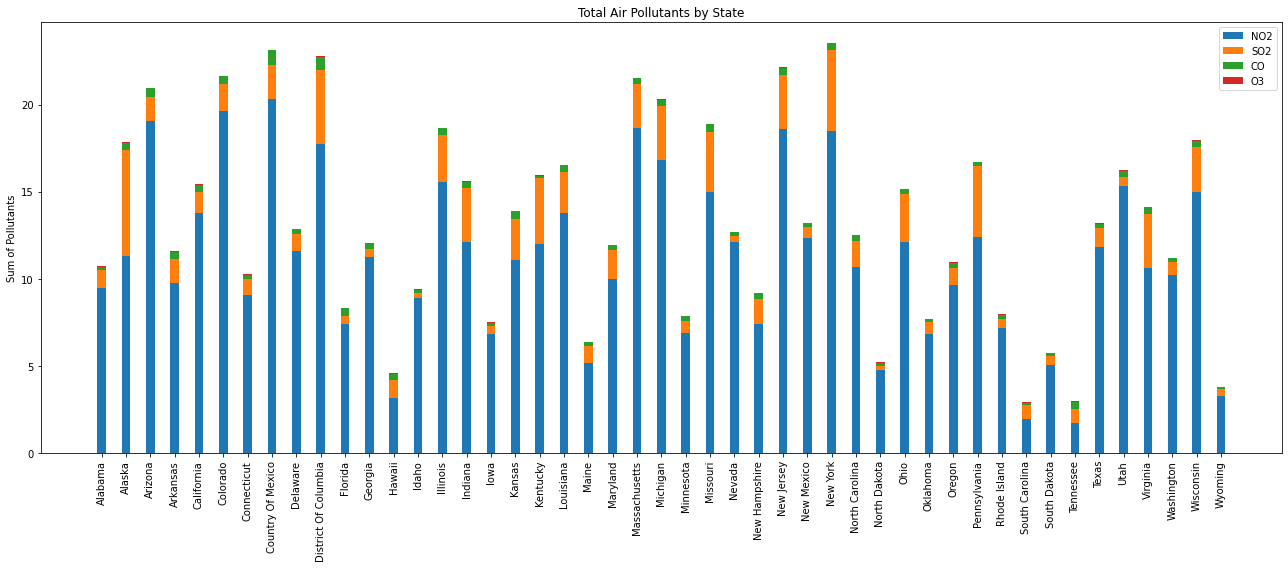

In [172]:

#different units

width = 0.35       

fig, ax = plt.subplots(figsize=(18,8))

ax.bar(s.index, s['NO2 Mean'], width, label='NO2')
ax.bar(s.index, s['SO2 Mean'], width, bottom=s['NO2 Mean'],
       label='SO2')
ax.bar(s.index, s['CO Mean'], width, bottom = (s['NO2 Mean'] + s['SO2 Mean']), label='CO')
ax.bar(s.index, s['O3 Mean'], width, bottom=(s['NO2 Mean'] + s['SO2 Mean'] +s['CO Mean']),
       label='O3')

ax.set_ylabel('Sum of Pollutants')
ax.set_title('Total Air Pollutants by State')
ax.legend()
ax.set_xticklabels(labels=s2.index,rotation=90)
fig.tight_layout() 
plt.show()

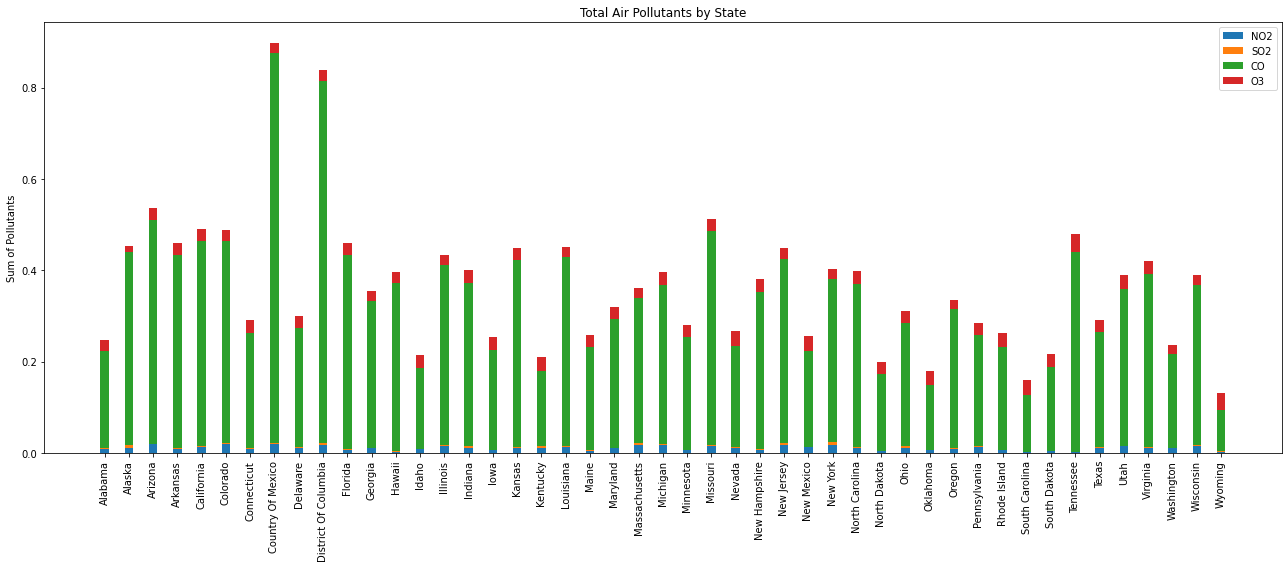

In [188]:
#corrected units to PPM
width = 0.35       

fig, ax = plt.subplots(figsize=(18,8))

ax.bar(s3.index, s3['NO2 Mean'], width, label='NO2')
ax.bar(s3.index, s3['SO2 Mean'], width, bottom=s3['NO2 Mean'],
       label='SO2')
ax.bar(s3.index, s3['CO Mean'], width, bottom = (s3['NO2 Mean'] + s3['SO2 Mean']), label='CO')
ax.bar(s3.index, s3['O3 Mean'], width, bottom=(s3['NO2 Mean'] + s3['SO2 Mean'] +s3['CO Mean']),
       label='O3')

ax.set_ylabel('Sum of Pollutants')
ax.set_title('Total Air Pollutants by State')
ax.legend()
ax.set_xticklabels(labels=s2.index,rotation=90)
fig.tight_layout() 
plt.show()

In [185]:
NO2corrSO2 = data['NO2 Mean'].corr(data['SO2 Mean'])
NO2corrCO = data['NO2 Mean'].corr(data['CO Mean'])
NO2corrO3 = data['NO2 Mean'].corr(data['O3 Mean'])
print(NO2corrSO2)
print(NO2corrCO)
print(NO2corrO3)

0.3481860267850431
0.6418281040063403
-0.4326501374370645


In [183]:
SO2corrSO2 = data['SO2 Mean'].corr(data['O3 Mean'])
SO2corrCO = data['SO2 Mean'].corr(data['CO Mean'])
print(SO2corrSO2)
print(SO2corrCO)

-0.11040144027590058
0.21521637584882228


In [184]:
COcorrO3 = data['CO Mean'].corr(data['O3 Mean'])
print(COcorrO3)

-0.33942643019387436


In [189]:
purged.shape

(1722197, 34)

In [196]:
purged.isnull().any(axis=0)

Unnamed: 0           False
State Code           False
County Code          False
Site Num             False
Address              False
State                False
County               False
City                 False
Date Local           False
NO2 Units            False
NO2 Mean             False
NO2 1st Max Value    False
NO2 1st Max Hour     False
NO2 AQI              False
O3 Units             False
O3 Mean              False
O3 1st Max Value     False
O3 1st Max Hour      False
O3 AQI               False
SO2 Units            False
SO2 Mean             False
SO2 1st Max Value    False
SO2 1st Max Hour     False
SO2 AQI               True
CO Units             False
CO Mean              False
CO 1st Max Value     False
CO 1st Max Hour      False
CO AQI                True
SO2 AQI Level         True
NO2 AQI Level         True
O3 AQI Level          True
CO AQI Level          True
year                 False
dtype: bool

In [215]:
import numpy as np
COindex = purged['CO AQI'].index[purged['CO AQI'].apply(np.isnan)]

In [218]:
len(COindex)

861067

In [219]:
len([i for i in index if i<860000])

429949

In [220]:
import numpy as np
SO2index = purged['SO2 AQI'].index[purged['SO2 AQI'].apply(np.isnan)]

In [221]:
len([i for i in index if i<860000])

429949

In [ ]:
purged = a[(a[['NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour',
       'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour']] >=0).all(1)]

In [247]:
coaqi = [i for i in purged['CO AQI'] if str(i) != 'nan' ]